In [2]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

In [3]:
from tensorflow.keras.models import load_model

In [4]:
interpreter = tf.lite.Interpreter(model_path='new/MobileNet.tflite')
interpreter.allocate_tensors()

In [5]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [6]:
print("Input shape:", input_details[0]['shape'])
print("Input type:", input_details[0]['dtype'])
print("Output shape:", output_details[0]['shape'])
print("Output type:", output_details[0]['dtype'])
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)

Input shape: [  1 224 224   3]
Input type: <class 'numpy.float32'>
Output shape: [1 1]
Output type: <class 'numpy.float32'>


In [7]:
import cv2

Adulterated 
100.00%
Actual number predicted: 6.099045574137207e-11


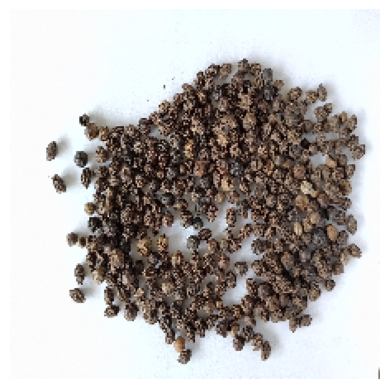

In [55]:
img = cv2.imread('new/Adulterated3.1MP/A (4).jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV loads images in BGR, convert to RGB
resized_img = cv2.resize(img, (input_shape[1], input_shape[2]))  # Resize to the model's input shape
input_data = np.expand_dims(resized_img, axis=0).astype(np.float32)
input_data /= 255.0  # Normalize pixel values to [0, 1]
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
# Interpret the output
threshold = 0.5
predicted_class = 'Pure' if output_data[0][0] > threshold else 'Adulterated'
confidence_level = (output_data[0][0] - 0.5) * 2 * 100 if output_data[0][0] > threshold else (0.5 - output_data[0][0]) * 2 * 100
print(f'{predicted_class} \n{confidence_level:.2f}%')
print(f'Actual number predicted: {output_data[0][0]:}')
plt.axis('off')
plt.show()